In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import math
import random

import plotly.graph_objects as go

In [2]:
# A simple expression
def f(x):
    return 3 * x**2 - 4 * x + 5

In [3]:
# f(x) is a simple function that takes an input and maps it
# to an output
out = f(3.0)
print(out)

20.0


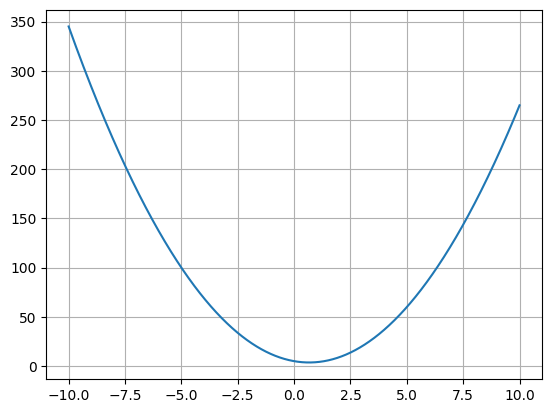

In [4]:
# We can also plot f(x)
xs = np.arange(start=-10, stop=10, step=0.002)
ys = f(xs)

plt.plot(xs, ys)
plt.grid(True)
plt.show();

Here, \
The function is y = 3x^2 - 4x + 5 

derivative:\
dy / dx = 3.2.x - 4\
or, dy / dx = 6x - 4


So what is the derivative of this function at x = 2?\
[dy / dx](x = 2) = 6 * 2 - 4 = 8


Let's also not forget that derivative is,
dy / dx = The rate in which y changes if we slightly nudge x\
So, dy / dx = [f(x + h) - f(x)] / h\
Where h is extremely small!

Let's manually verfify if at x = 2, the derivative is 8.

In [5]:
x = 2
y_old = f(x=2)

# Nudge x with h
h = 0.000000000001

# Now x becomes x + h
x += h
y_new = f(x=x)

# Rise over run, how much does y change as we have already changed x by h
print("Derivative of y:", (y_new - y_old) / h)

Derivative of y: 8.000711204658728


In [6]:
# Let's get 3D
def f(x, y):
    return x * y


x = np.arange(-10, 10, 0.25)
y = np.arange(-10, 10, 0.25)
z = f(x, y)

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode="markers")])

fig.update_layout(
    scene=dict(xaxis_title="X Axis", yaxis_title="Y Axis", zaxis_title="Z Axis")
)

# Show the plot
fig.show()

z = f(x, y) = x * y

Now, dz / dx = d(x * y) / dx = x * dy/dx + y * dx/dx 

or, dz / dx = x * 0 + y 

So, finally dz / dx = y 


So, derivative of this function(z) at x = 2 is,/
(dz / dx)[x = 2] = y

In [7]:
h = 0.00000000001

x = 2.00
y = 5.00  # Assume
# Compute f(x, y)
z_old = f(x, y)

# Nudge x with h
x += h
y = 5.00

z_new = f(x, y)
print("Derivative of z w.r to x (2) while y = 5.00 is -", (z_new - z_old) / h)

Derivative of z w.r to x (2) while y = 5.00 is - 5.000089231543825


In [8]:
# Neural networks are massive expressions
# So, we need a data structure
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        # For nice prints when we do print(Value(data = x.0))
        return f"Value(data={self.data})"

In [9]:
a = Value(5.0)
print(a)

# Python internally calls
# print(a.__repr__())

Value(data=5.0)


In [10]:
# a = Value(5.0)
# b = Value(2.0)

# # Error because python does not know how to add 2 value objects
# out = a + b

In [11]:
# Update the Value object
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return self.data + other.data

    def __mul__(self, other):
        return self.data * other.data

In [12]:
a = Value(5.0)
b = Value(2.0)

out = a + b
print(out)

7.0


In [13]:
# We also want to know what values produce other values
# We need to have pointers to the children nodes of a certain value
# Update the Value object
class Value:
    def __init__(self, data, _children=()):
        self.data = data
        self._prev = set(_children)

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Value(data=self.data + other.data, _children=(self, other))

    def __mul__(self, other):
        return Value(data=self.data * other.data, _children=(self, other))

In [14]:
a = Value(3.0)
b = Value(2.0)
c = Value(5.0)

ab = a * b
print("a * b: ", ab)
print("Childrens of ab:", ab._prev)

print()

out = ab + c
print(out)
# Out was created by
print(out._prev)

a * b:  Value(data=6.0)
Childrens of ab: {Value(data=2.0), Value(data=3.0)}

Value(data=11.0)
{Value(data=6.0), Value(data=5.0)}


In [15]:
# Now we would like to know what operation created those nodes
# We need to keep track of ops to flow backward
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Value(data=self.data + other.data, _children=(self, other), _op="+")

    def __mul__(self, other):
        return Value(data=self.data * other.data, _children=(self, other), _op="*")

In [16]:
a = Value(3.0, label="a")
b = Value(2.0, label="b")
c = Value(5.0, label="c")

ab = a * b
print("a * b: ", ab)
ab.label = "a * b"
print("Childrens of ab:", ab._prev)
print("Op of ab:", ab._op)

print()

out = ab + c
print(out)
out.label = "out"
# Out was created by
print(out._prev)
print(out._op)

a * b:  Value(data=6.0)
Childrens of ab: {Value(data=3.0), Value(data=2.0)}
Op of ab: *

Value(data=11.0)
{Value(data=5.0), Value(data=6.0)}
+


In [17]:
# I do not understand this
# TODO: Understand this
from graphviz import Digraph


def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})  # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(
            name=uid,
            label="{ %s | data %.4f | grad  %.4f} " % (n.label, n.data, n.grad),
            shape="record",
        )
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

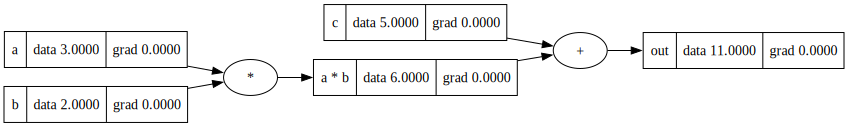

In [18]:
draw_dot(out)

In [19]:
# Let's get more complex
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a * b
e.label = "e"
d = e + c
d.label = "d"
f = Value(-2.0, label="f")
L = d * f
L.label = "L"

print(L)

Value(data=-8.0)


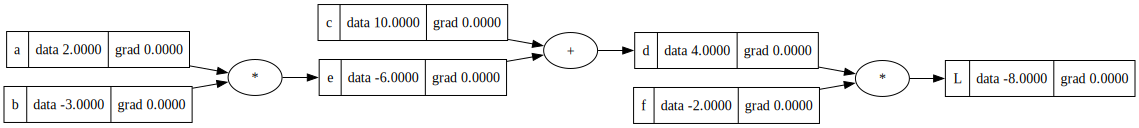

In [20]:
# Expression
draw_dot(L)

If we nudle L with h, how much does L change? 
The answer is h, it is proportional!
change is h/h = 1

So, dL/dL = 1

In [21]:
# Children nodes of L
print(L._prev)
# Operation that created L
print(L._op)

{Value(data=4.0), Value(data=-2.0)}
*


We know that L = d * f

df/dd is 0

f is not impacted by d in any way in the graph

So, dL/dd = d(d*f)/dd = d * df/dd + f * dd/dd = f

Hence, dL/dd = f


Or, manually! We need to nudge d with h as we are taking derivative wr to d.

So, dL/dd = f(x + h) - f(x) / h = (d + h) * f - df / h = d * f + h * f - d * f / h = f


What is dL/df = d

We need to nudge f by h.

So, dL/dd = f(x + h) - f(x) / h = d * (f + h) - df / h = df + dh - df / h = d

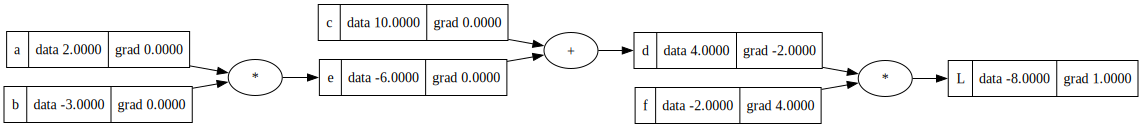

In [22]:
# We want to compute grad with respect to d.
# Here, dL / dL = 1.00
# dL / df = 4.00 (d)
# dL / dd = -2.0 (f)

# hardcode gradients
L.grad = 1.0  # Base case
d.grad = -2.0
f.grad = 4.0


draw_dot(L)

Derivative of L with respect to d:  -2.0000000056086265
Derivative of L with respect to f:  4.000000002335469
Derivative of L with respect to a:  1.0000000028043132


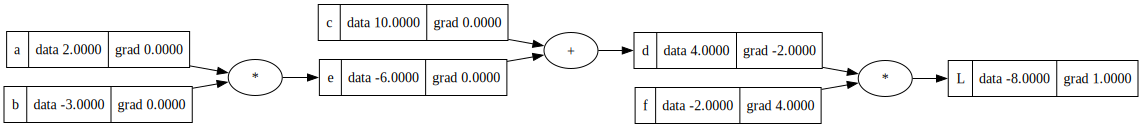

In [23]:
# INLINE GRADIENT CHECK
# Let's double check if dL/dd is correct
def out_scope():
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "L"

    h = 0.0000001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.data += h  # Nudge d
    d.label = "d"
    f = Value(-2.0, label="f")
    L_NEW = d * f
    L_NEW.label = "L"

    print("Derivative of L with respect to d: ", (L_NEW.data - L.data) / h)


out_scope()


# Let's double check if dL/df is correct
def out_scope():
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "L"

    h = 0.0000001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0 + h, label="f")  # Nudge f
    L_NEW = d * f
    L_NEW.label = "L"

    print("Derivative of L with respect to f: ", (L_NEW.data - L.data) / h)


out_scope()


def out_scope():
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "L"

    h = 0.0000001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L_NEW = d * f
    L_NEW.data += h
    L_NEW.label = "L"

    print("Derivative of L with respect to a: ", (L_NEW.data - L.data) / h)


out_scope()


draw_dot(L)

We want to know dL/dc!

We already know how L is sensitive to d, and we also know how d is sensitive to c.

So, if L is impacted by d, and d is impacted by c then can not we just multiply? [Chain rule of calculus!]

What is the impact of c on d?

dd/dc = ?

We know, d = (e + c)

-> dd/dc = de/dc + dc/dc = 0 + 1 = 1

Or, dd/dc = f(x + h) - f(x) / h = (e + c + h - e - c) / h =  1


By symmetry! dd/de = 1


Intuition: The sum expression just routes! The derivative of dL/dd gets routed

Derivative of L with respect to c:  -1.999999987845058
Derivative of L with respect to e:  -2.0000000056086265


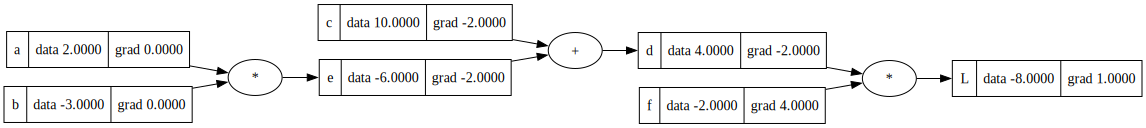

In [24]:
c.grad = -2.00 * 1
e.grad = -2.00 * 1


# Let's verify manually!
def out_scope():
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "L"

    h = 0.0000001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    c.data += h  # Nudge c
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L_NEW = d * f
    L_NEW.label = "L"

    print("Derivative of L with respect to c: ", (L_NEW.data - L.data) / h)


out_scope()


# Let's verify manually!
def out_scope():
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "L"

    h = 0.0000001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    e.data += h  # Nudge e
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L_NEW = d * f
    L_NEW.label = "L"

    print("Derivative of L with respect to e: ", (L_NEW.data - L.data) / h)


out_scope()


# Plus node distributes the derivative of the next node to all the children nodes
draw_dot(L)

dL/de = -2.0

WANT: dL/da = dL/de * de/da

de/da = b = -3.0

So, de/da = -3.0

hence, dL/da = -3.0 * -2.0 = 6.0

Derivative of L with respect to a:  5.999999963535174
Derivative of L with respect to b:  -3.999999975690116


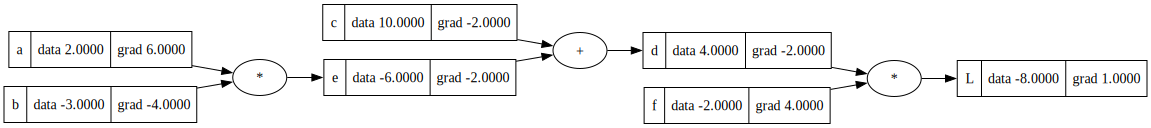

In [25]:
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0


# Let's verify manually!
def out_scope():
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "L"

    h = 0.00000001
    a = Value(2.0 + h, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L_NEW = d * f
    L_NEW.label = "L"

    print("Derivative of L with respect to a: ", (L_NEW.data - L.data) / h)


out_scope()


def out_scope():
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L = d * f
    L.label = "L"

    h = 0.00000001
    a = Value(2.0, label="a")
    b = Value(-3.0 + h, label="b")
    c = Value(10.0, label="c")
    e = a * b
    e.label = "e"
    d = e + c
    d.label = "d"
    f = Value(-2.0, label="f")
    L_NEW = d * f
    L_NEW.label = "L"

    print("Derivative of L with respect to b: ", (L_NEW.data - L.data) / h)


out_scope()


draw_dot(L)

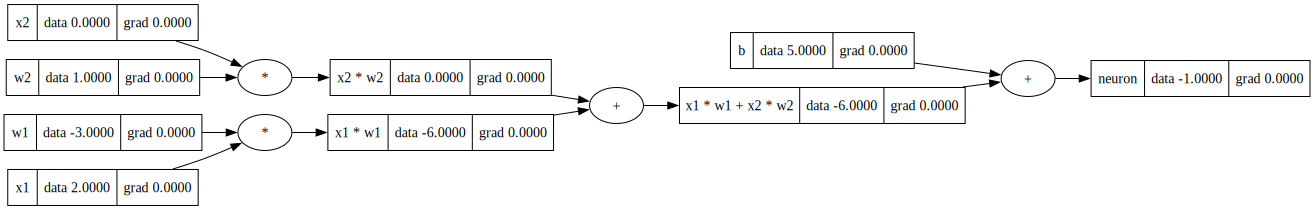

In [26]:
# Draw a single neuron

# Input data
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# Weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

b = Value(5.0, label="b")

# Comute intermideate nodes
x1w1 = x1 * w1
x1w1.label = "x1 * w1"

x2w2 = x2 * w2
x2w2.label = "x2 * w2"

# Compute the dot product
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1 * w1 + x2 * w2"

neuron = x1w1x2w2 + b
neuron.label = "neuron"

draw_dot(neuron)

In [27]:
# Add tanh activation function
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Value(data=self.data + other.data, _children=(self, other), _op="+")

    def __mul__(self, other):
        return Value(data=self.data * other.data, _children=(self, other), _op="*")

    def tanh(self):
        n = self.data
        t = (math.exp(2 * n) - 1) / (math.exp(2 * n) + 1)
        out = Value(data=t, _children=(self,), _op="tanh")
        return out

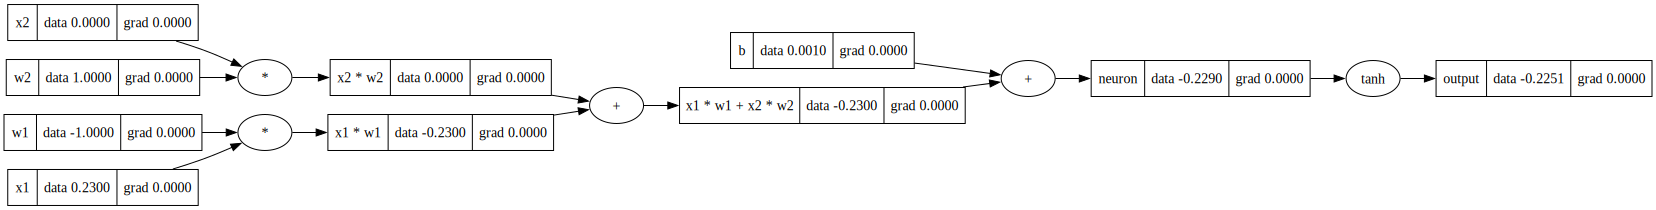

In [28]:
# With acitvation function
# Draw a single neuron

# Input data
x1 = Value(0.23, label="x1")
x2 = Value(0.0, label="x2")

# Weights
w1 = Value(-1.0, label="w1")
w2 = Value(1.0, label="w2")

b = Value(0.001, label="b")

# Comute intermideate nodes
x1w1 = x1 * w1
x1w1.label = "x1 * w1"

x2w2 = x2 * w2
x2w2.label = "x2 * w2"

# Compute the dot product
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1 * w1 + x2 * w2"

neuron = x1w1x2w2 + b
neuron.label = "neuron"

# Apply the activation function
out = neuron.tanh()
out.label = "output"

draw_dot(out)

derivative of tanh is a function of tanh itself. So it is very efficient.

-> d(tanh(x))/dx = 1 - tanh^2(x)


d(out)/dn = 1 - out^2

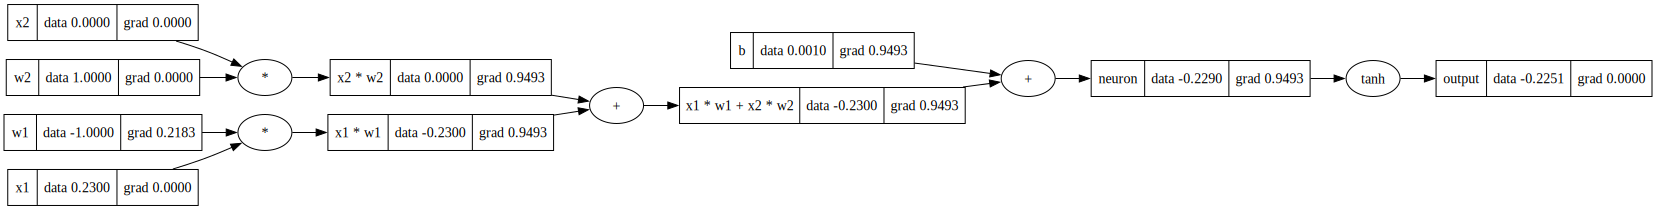

In [29]:
# Base case
out.grad = 0.0
# Derivative of the neuron with respect to tanh is 1 - output ** 2
neuron.grad = 1 - (out.data**2)

# Plus node is a distributor of gradient
# So gradient just flows through the children nodes (b and x1 * w1 + x2 * w2)
# Plus node routing the gradients
x1w1x2w2.grad = neuron.grad
b.grad = neuron.grad

# Again we have another plus sign! So the gradients will again flow back to childres nodes
# x2 * w2 and x1 * w1
x2w2.grad = x1w1x2w2.grad
x1w1.grad = x1w1x2w2.grad

# Now we again have a multiplication
w2.grad = x2.data * x2w2.grad
w1.grad = x1.data * x1w1.grad

draw_dot(out)

In [30]:
# Let's automate backprop
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data}, label={self.label})"

    def __add__(self, other):
        out = Value(data=self.data + other.data, _children=(self, other), _op="+")

        def _backward():
            # Addition always routes the gradient
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(data=self.data * other.data, _children=(self, other), _op="*")

        def _backward():
            # Multiplication takes the other input and the next
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward

        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2 * n) - 1) / (math.exp(2 * n) + 1)
        out = Value(data=t, _children=(self,), _op="tanh")

        def _backward():
            self.grad = (1 - t**2) * out.grad

        out._backward = _backward
        return out

In [31]:
# Redefine
# With acitvation function
# Draw a single neuron

# Input data
x1 = Value(0.23, label="x1")
x2 = Value(0.0, label="x2")

# Weights
w1 = Value(-1.0, label="w1")
w2 = Value(1.0, label="w2")

b = Value(0.001, label="b")

# Comute intermideate nodes
x1w1 = x1 * w1
x1w1.label = "x1 * w1"

x2w2 = x2 * w2
x2w2.label = "x2 * w2"

# Compute the dot product
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1 * w1 + x2 * w2"

neuron = x1w1x2w2 + b
neuron.label = "neuron"

# Apply the activation function
out = neuron.tanh()
out.label = "output"

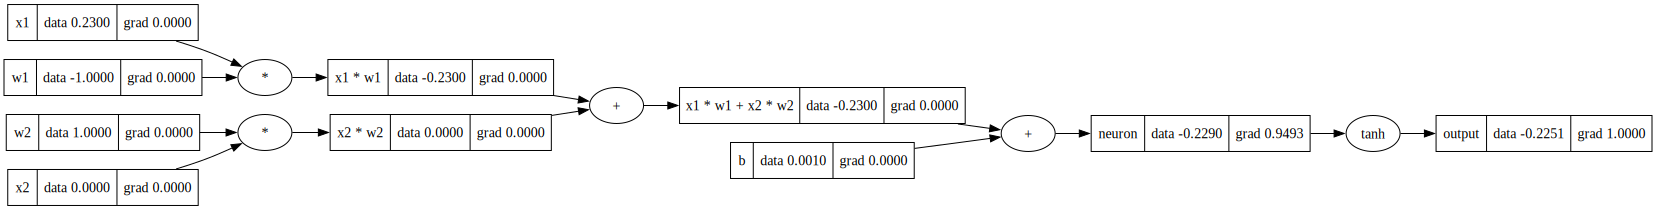

In [32]:
# Set base case
out.grad = 1.00
out._backward()

draw_dot(out)

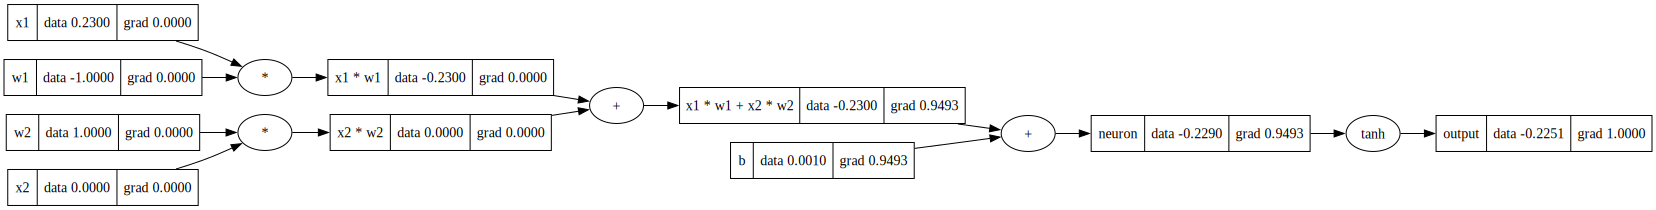

In [33]:
neuron._backward()
draw_dot(out)

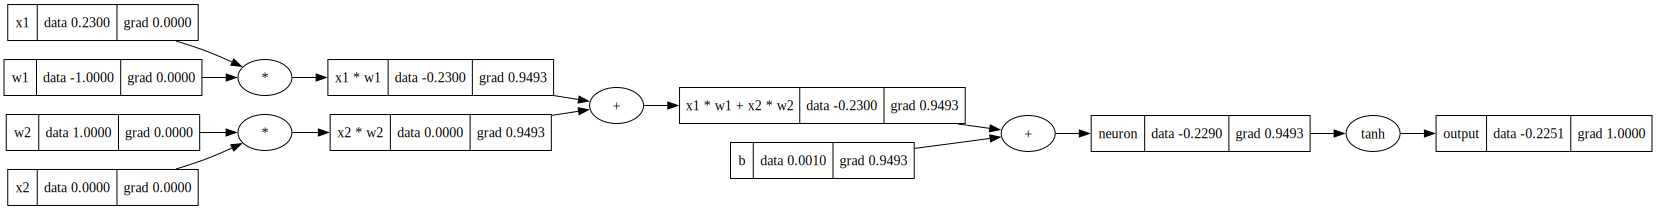

In [34]:
x1w1x2w2._backward()
draw_dot(out)

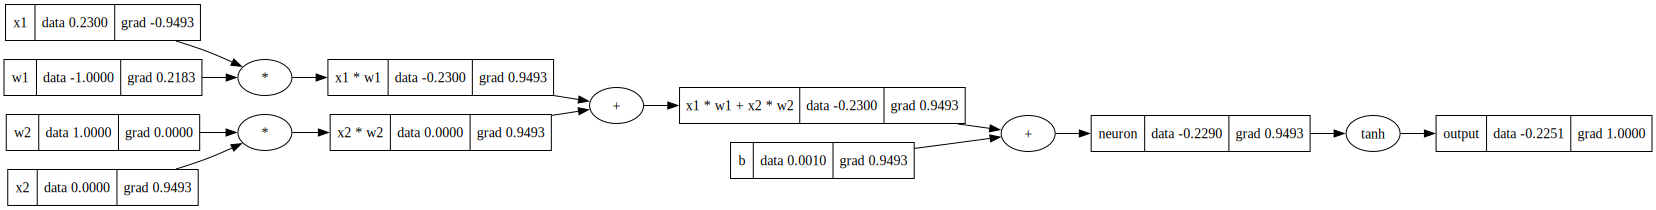

In [35]:
x2w2._backward()
x1w1._backward()
draw_dot(out)

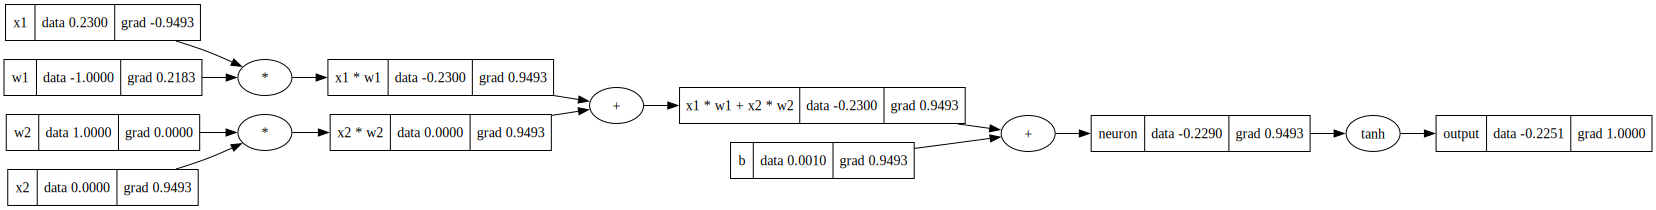

In [36]:
# Call backward on the weights
w2._backward()
w1._backward()

# Call backward on the inputs
x1._backward()
x2._backward()

draw_dot(out)

When we perform backward we need to make sure, whatever node we are performing backward on, next of it we have computed.
Topological sort sorts the graph for that.

In [37]:
topo = []
visited = set()


def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)


build_topo(out)

topo  

[Value(data=0.001, label=b),
 Value(data=1.0, label=w2),
 Value(data=0.0, label=x2),
 Value(data=0.0, label=x2 * w2),
 Value(data=0.23, label=x1),
 Value(data=-1.0, label=w1),
 Value(data=-0.23, label=x1 * w1),
 Value(data=-0.23, label=x1 * w1 + x2 * w2),
 Value(data=-0.229, label=neuron),
 Value(data=-0.2250792268818303, label=output)]

In [38]:
list(reversed(topo))

[Value(data=-0.2250792268818303, label=output),
 Value(data=-0.229, label=neuron),
 Value(data=-0.23, label=x1 * w1 + x2 * w2),
 Value(data=-0.23, label=x1 * w1),
 Value(data=-1.0, label=w1),
 Value(data=0.23, label=x1),
 Value(data=0.0, label=x2 * w2),
 Value(data=0.0, label=x2),
 Value(data=1.0, label=w2),
 Value(data=0.001, label=b)]

In [39]:
# Define the backward
# Let's automate backprop
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data}, label={self.label})"

    def __add__(self, other):
        out = Value(data=self.data + other.data, _children=(self, other), _op="+")

        def _backward():
            # Addition always routes the gradient
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(data=self.data * other.data, _children=(self, other), _op="*")

        def _backward():
            # Multiplication takes the other input and the next
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward

        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2 * n) - 1) / (math.exp(2 * n) + 1)
        out = Value(data=t, _children=(self,), _op="tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward
        return out
    
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.00
        for node in reversed(topo):
            node._backward()

In [40]:
# Redefine
# With acitvation function
# Draw a single neuron

# Input data
x1 = Value(0.23, label="x1")
x2 = Value(0.0, label="x2")

# Weights
w1 = Value(-1.0, label="w1")
w2 = Value(1.0, label="w2")

b = Value(0.001, label="b")

# Comute intermideate nodes
x1w1 = x1 * w1
x1w1.label = "x1 * w1"

x2w2 = x2 * w2
x2w2.label = "x2 * w2"

# Compute the dot product
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1 * w1 + x2 * w2"

neuron = x1w1x2w2 + b
neuron.label = "neuron"

# Apply the activation function
out = neuron.tanh()
out.label = "output"

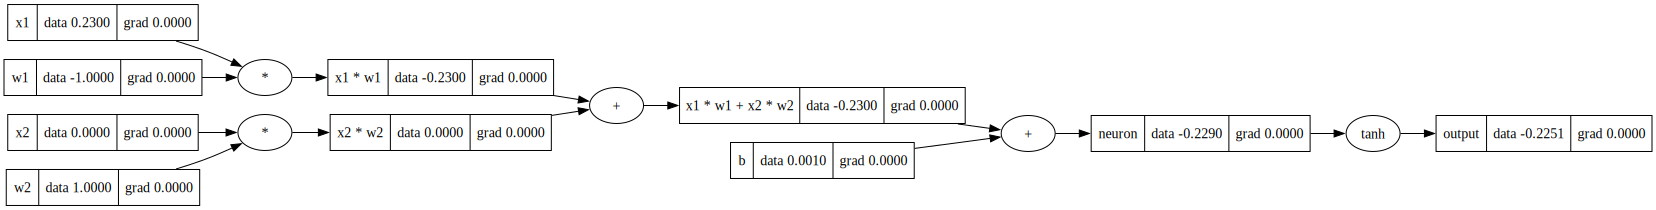

In [41]:
draw_dot(out)

In [42]:
out.backward()

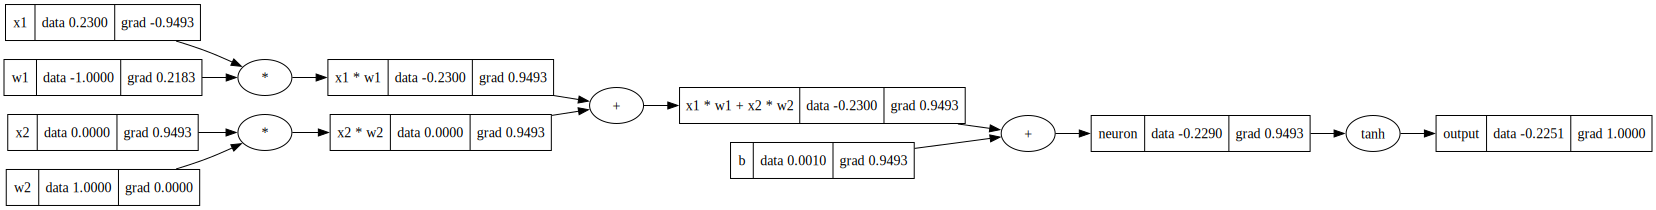

In [43]:
draw_dot(out)

In [44]:
# Let's fix this
a = Value(2.0, label="a")
print(a)

a * 2

Value(data=2.0, label=a)


AttributeError: 'int' object has no attribute 'data'

In [45]:
# Define the backward
# Let's automate backprop
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data}, label={self.label})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(data=self.data + other.data, _children=(self, other), _op="+")

        def _backward():
            # Addition always routes the gradient
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(data=self.data * other.data, _children=(self, other), _op="*")

        def _backward():
            # Multiplication takes the other input and the next
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward

        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2 * n) - 1) / (math.exp(2 * n) + 1)
        out = Value(data=t, _children=(self,), _op="tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward
        return out
    
    def exp(self):
        # Contains the output of the exponential op
        out = Value(math.exp(self.data), _children=(self,), _op = 'exp')
        
        def _backward():
            # d(e**x)/dx = e**x
            self.grad += out.data * out.grad

        out._backward = _backward
        return out
    
    def __radd__(self, other):
        return self + other

    def __rmul__(self, other):
        return self * other

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        self.grad = 1.00
        for node in reversed(topo):
            node._backward()

In [46]:
# Let's fix this
a = Value(2.0, label="a")
print(a)

a * 2

Value(data=2.0, label=a)


Value(data=4.0, label=)

In [47]:
# Let's fix this
# Because as of now python does a.__mul__(2) and that works!
# But if 2.__mul__(a) then it does not work
a = Value(2.0, label="a")
print(a)

2 * a

Value(data=2.0, label=a)


Value(data=4.0, label=)

In [48]:
a = Value(2.0, label="a")
a.exp()

Value(data=7.38905609893065, label=)

Implement division

Note that,

a / b = a * (1 / b) = a * (b ** -1)

So, we can add multiplications like this

In [49]:
# Define the backward
# Let's automate backprop
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None

    def __repr__(self):
        if self.label:
            return f"Value(data={self.data}, label={self.label})"
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(data=self.data + other.data, _children=(self, other), _op="+")

        def _backward():
            # Addition always routes the gradient
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(data=self.data * other.data, _children=(self, other), _op="*")

        def _backward():
            # Multiplication takes the other input and the next
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward

        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2 * n) - 1) / (math.exp(2 * n) + 1)
        out = Value(data=t, _children=(self,), _op="tanh")

        def _backward():
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward
        return out

    def exp(self):
        # Contains the output of the exponential op
        out = Value(math.exp(self.data), _children=(self,), _op="exp")

        def _backward():
            # d(e**x)/dx = e**x
            self.grad += out.data * out.grad

        out._backward = _backward
        return out

    def __radd__(self, other):
        return self + other

    def __rmul__(self, other):
        return self * other

    def __pow__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data**other.data, _children=(self,), label="f**(other)")

        def _backward():
            # TODO: Why use other obj? and not the value?
            self.grad = other * (self ** (other - 1)) * out.grad
            # self.grad = other.data * (self.data ** (other.data - 1)) * out.grad
            
        out._backward = _backward
        return out

    def __neg__(self):
        return -1 * self

    def __sub__(self, other):
        # For this we need to implement negation
        return self + (-other)

    def __truediv__(self, other):
        # As a / b = a * (b ** -1)
        return self.data * (other.data**-1)

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        self.grad = 1.00
        for node in reversed(topo):
            node._backward()

In [50]:
# Input data
x1 = Value(0.23, label="x1")
x2 = Value(5.0, label="x2")

# Weights
w1 = Value(-1.0, label="w1")
w2 = Value(1.0, label="w2")

b = Value(0.001, label="b")

# Comute intermideate nodes
x1w1 = x1 * w1
x1w1.label = "x1 * w1"

x2w2 = x2 * w2
x2w2.label = "x2 * w2"

# Compute the dot product
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1 * w1 + x2 * w2"

neuron = x1w1x2w2 + b
neuron.label = "neuron"

# Apply the activation function
out = neuron.tanh()
out.label = "output"

In [51]:
out.backward()

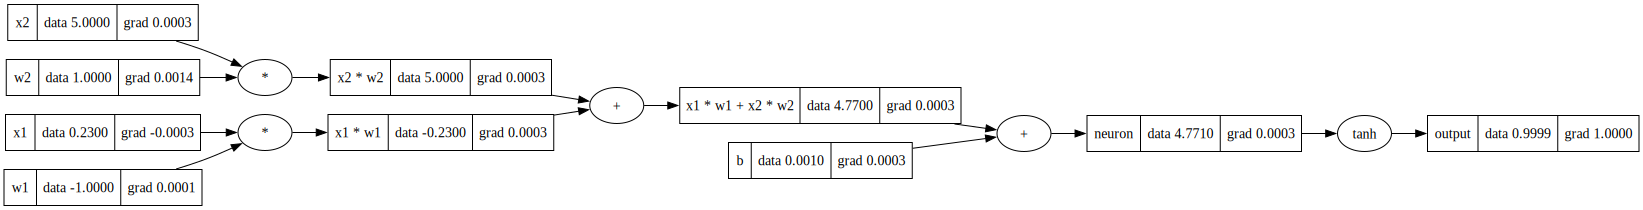

In [52]:
draw_dot(out)

In [131]:
class Neuron:
    def __init__(self, n_in):
        # Initialize weights
        self.n_in = n_in
        self.w = [Value(random.uniform(-1, 1), label = f'w_{i}') for i, _ in enumerate(range(n_in), start = 1)]
        # Initialize bias
        self.b = Value(random.uniform(-1, 1), label = 'b')

    def __call__(self, x):
        # Compute w^T * x + b
        assert self.n_in == len(x), 'Input size does not match'
        act = sum([ix * iw for ix, iw in zip(self.w, x)], self.b)
        # Pass it through an activation function
        out = act.tanh()
        return out


# Define a Layer
class Layer:
    def __init__(self, n_in, n_neurons):
        self.n_neurons = n_neurons
        self.neurons = [Neuron(n_in) for _ in range(n_neurons)]

    def __call__(self, x):
        # Forward pass through the layer
        out = [neu(x) for neu in self.neurons]
        return out if len(out) > 1 else out[0]
    
    def set_zero_grad(self):
        for neu in self.neurons:
            for ws in neu.w:
                ws.grad = 0
            neu.b = 0


# Building a MLP
class MLP:
    def __init__(self):
        # Each neuron in the layer has tanh activation
        self.first_layer = Layer(n_in=2, n_neurons=10)
        self.second_layer = Layer(n_in=10, n_neurons=1)

    def __call__(self, x):
        first_out = self.first_layer(x)
        logit = self.second_layer(first_out)
        return logit
    
    def set_zero_grad(self):
        self.first_layer.set_zero_grad()
        self.second_layer.set_zero_grad()

Output of a neuron:  Value(data=-0.9999254578270903)


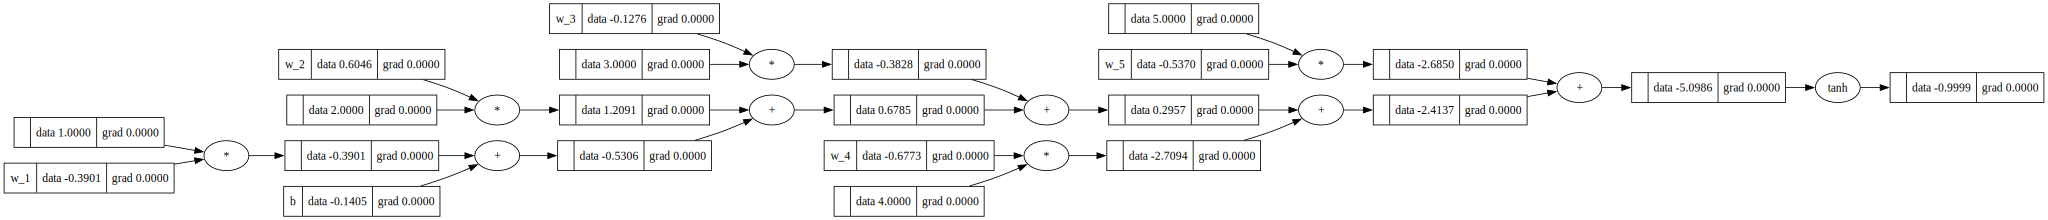

In [158]:
x = [1.0, 2.0, 3.0, 4.0, 5.0]

# Define the neuron
neuron = Neuron(n_in=5)
out = neuron(x)
print('Output of a neuron: ', out)

draw_dot(out)

In [160]:
# Let's define dataset
x = [[1, 2], [2, 3], [3, 4], [4, 5]]
y = [1.0, 1.0, -1.0, -1.0]

# Define
nn = MLP()

# Forward pass
logits = []
for ix in x:
    out = nn(ix)
    logits.append(out)
    
    
# Compute loss
mse_loss = sum([(logit - iy) ** 2 for (logit, iy) in zip(logits, y)])

print('MSE loss before backprop: ', mse_loss)

# backprop
mse_loss.backward()

# Zero grad
nn.set_zero_grad()
    
    
# Forward pass?
logits = []
for ix in x:
    out = nn(ix)
    logits.append(out)
    
mse_loss = sum([(logit - iy) ** 2 for (logit, iy) in zip(logits, y)])
print('After backprop: ', mse_loss)

MSE loss before backprop:  Value(data=7.001331554693645)
After backprop:  Value(data=6.633163665263694)
MSE loss before backprop:  Value(data=6.633163665263694)
After backprop:  Value(data=6.633163665263694)
MSE loss before backprop:  Value(data=6.633163665263694)
After backprop:  Value(data=6.633163665263694)
MSE loss before backprop:  Value(data=6.633163665263694)
After backprop:  Value(data=6.633163665263694)
MSE loss before backprop:  Value(data=6.633163665263694)
After backprop:  Value(data=6.633163665263694)
